<a href="https://colab.research.google.com/github/MatteoGhizzi/MLPNS2021/blob/main/Lezione8-9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import pylab as pl

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/fedhere/MLPNS2021/main/HW3_LinearRegression/grb050525A.csv")

In [3]:
data.head()

,filter,time,mag,magerr,upperlimit
0,V,66,13.21,0.24,0
1,V,67,12.90,0.23,0
2,V,68,12.86,0.23,0
3,V,69,13.01,0.23,0
4,V,70,12.97,0.23,0


In [4]:
data.tail()

,filter,time,mag,magerr,upperlimit
114,W1,63738,NaN,21.20,1
115,M2,74798,NaN,21.59,1
116,U,128928,NaN,20.05,1
117,V,971360,NaN,22.09,1
118,V,1171176,NaN,21.16,1


In [5]:
data['logtime'] = np.log10(data.time)
data['logmag'] = np.log10(data.mag)

In [6]:
data.head()

,filter,time,mag,magerr,upperlimit,logtime,logmag
0,V,66,13.21,0.24,0,1.819544,1.120903
1,V,67,12.90,0.23,0,1.826075,1.110590
2,V,68,12.86,0.23,0,1.832509,1.109241
3,V,69,13.01,0.23,0,1.838849,1.114277
4,V,70,12.97,0.23,0,1.845098,1.112940


In [ ]:
data.tail()

,filter,time,mag,magerr,upperlimit,logtime,logmag
114,W1,63738,NaN,21.20,1,4.804398,NaN
115,M2,74798,NaN,21.59,1,4.873890,NaN
116,U,128928,NaN,20.05,1,5.110347,NaN
117,V,971360,NaN,22.09,1,5.987380,NaN
118,V,1171176,NaN,21.16,1,6.068622,NaN


In [7]:
data.shape

(119, 7)

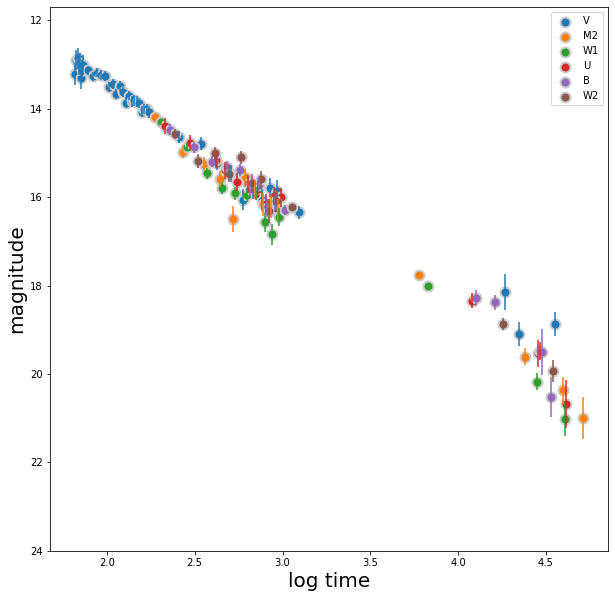

In [8]:
#create a figure container and an axis object inside of it
ax = pl.figure(figsize=(10,10)).add_subplot(111)
    
#loop on every filter to plot - this will give differnt colors naturally. 
#Use pl.errorbar to plot the uncertainties
for f in data["filter"].unique():
    pl.errorbar(data.loc[data["filter"] == f, "logtime"], 
                data.loc[data["filter"] == f, "mag"], 
                yerr=data.loc[data["filter"] == f, "magerr"], fmt='.', ms=0,
                fcolor=None, label=None)
    
# replot to add a better marker (optional)
for f in data["filter"].unique():
    pl.scatter(data.loc[data["filter"] == f, "logtime"], 
               data.loc[data["filter"] == f, "mag"], 
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')
    
 # I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
pl.ylim(24,11.7)          
pl.legend()

#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time", fontsize=20);   

In [9]:
dataA = data.loc[data.upperlimit == 0]

In [10]:
dataA.shape

(108, 7)

In [11]:
dataA.head()

,filter,time,mag,magerr,upperlimit,logtime,logmag
0,V,66,13.21,0.24,0,1.819544,1.120903
1,V,67,12.90,0.23,0,1.826075,1.110590
2,V,68,12.86,0.23,0,1.832509,1.109241
3,V,69,13.01,0.23,0,1.838849,1.114277
4,V,70,12.97,0.23,0,1.845098,1.112940


In [13]:
x = dataA.logtime.values
X = np.c_[np.ones((len(dataA), 1)),
          x]
y = dataA.mag.values
print("shape of the input array X", X.shape)
print("shape of the input array y", y.shape)
#note the shape in python is flipped compared to the shape in linear algebra

shape of the input array X (108, 2)
shape of the input array y (108,)


In [14]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X, y)
print ("best fit parameters from the sklearn LinearRegression(): " + 
       "intercept {:.2f}, slope {:.2f}".format(lr.intercept_, lr.coef_[1]))

best fit parameters from the sklearn LinearRegression(): intercept 8.58, slope 2.51


##Fit a line to the data (excluding the upper limits) by minimizing an objective function

In [17]:
# minimizziamo la funzione obbiettivo 

from scipy.optimize import minimize

def line(intercept, slope, x):
    return slope * x + intercept
def l1(args, x, y):
    a, b = args
    return sum(np.abs(y - line(a, b, x)))


initialGuess = (10, 1)

l1Solution = minimize(l1, initialGuess, args=(x, y))
print(l1Solution)
print("")
print("best fit parameters from the minimization of L1: " + 
       "slope {:.2f}, intercept {:.2f}".format(*l1Solution.x))


      fun: 26.303319250460245
 hess_inv: array([[ 3.72424367e-04, -8.83687028e-05],
       [-8.83687028e-05,  2.09754501e-05]])
      jac: array([-0.25146294, -2.20956945])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 712
      nit: 20
     njev: 175
   status: 2
  success: False
        x: array([8.22524041, 2.64075474])

best fit parameters from the minimization of L1: slope 8.23, intercept 2.64


##Fit a line to the data (excluding the upper limits) by minimizing an objective function that accounts for the measurements uncertainties
Since the data has uncertainty, choose the $\chi^2$ (chi squared) function as your objective function.

In [25]:
s = data.loc[data.upperlimit == 0].magerr.values

## FIT with a line using MCMC

In [15]:
!pip install emcee

     |████████████████████████████████| 51kB 5.0MB/s 


In [16]:
import emcee

bayes theorem for my data

In [18]:
def log_prior(theta):
  slope, intercept = theta
  if slope > 0 and intercept > 0: 
  # in teoria non dovremmo saperlo a priori,
  # ma è ovvio dalla fisica dei dati, posso mettere questi boundaries
   return 0
  return -np.inf # avrò qualcosa che non potrà essere il valore 
  #della  maximum likelihood

In [19]:
def log_likelihood(theta, x, y, yerr):
  slope, intercept = theta
  return -np.sum(((y - line(intercept, slope, x))**2)/ yerr**2)

In [20]:
def log_probability(theta, x, y, yerr):
  lp = log_prior(theta)
  if not np.isfinite(lp):
    return -np.inf

  return lp + log_likelihood(theta, x, y, yerr) 
# voglio log prob quindi sommo i due logaritmi...
# generalmente sarebbe una moltiplicazione

In [21]:
# ora chiamiamo emcee
ig = [10,1] #initial guess
nwalkers = 32
ndim = len(ig)

In [35]:
ndim

2

In [22]:
#initialize walkers
pos = np.array(ig) + 1e-4 * np.random.rand(nwalkers, ndim) 
# dall' initial guess genero un vettore di 32(numero di wlakers)
# per 2 colonne (dimensione dell'initial guess) 
# leggermenti distanti nello spazio in base alla grandezza dell'errore

In [23]:
pos.shape

(32, 2)

In [26]:
sampler =emcee.EnsembleSampler(nwalkers, ndim, log_probability,args=( x, y, s))


In [28]:
# questo fa andare il processo, il secondo parametro è la lunghezza delle catene
sampler.run_mcmc(pos, 5000, progress=True);

100%|██████████| 5000/5000 [00:06<00:00, 733.33it/s]


In [29]:
#quali zone hanno visitato i miei campioni?
samples = sampler.get_chain()
samples

array([[[10.00003007,  1.00001535],
        [10.00004607,  1.00007225],
        [10.00005258,  1.00005014],
        ...,
        [10.00004345,  1.00004374],
        [ 9.99998199,  1.00002238],
        [10.00008923,  1.00000671]],

       [[10.00003007,  1.00001535],
        [10.00004429,  1.00008411],
        [10.00003796,  1.00005667],
        ...,
        [10.00004345,  1.00004374],
        [ 9.99998199,  1.00002238],
        [10.00008242,  1.00002404]],

       [[10.00003165,  1.00001804],
        [10.00002683,  1.00009593],
        [10.00000867,  1.00007817],
        ...,
        [10.00004083,  1.00002834],
        [ 9.99990405,  1.00000121],
        [10.00008242,  1.00002404]],

       ...,

       [[ 2.46475096,  8.63735243],
        [ 2.4492145 ,  8.70259373],
        [ 2.47866401,  8.62017561],
        ...,
        [ 2.49456323,  8.5546629 ],
        [ 2.47197644,  8.63896304],
        [ 2.47280558,  8.61634296]],

       [[ 2.4741945 ,  8.60609546],
        [ 2.45979104,  8.65

In [30]:
samples.shape

(5000, 32, 2)

In [31]:
#la catena mi dice la probabilità, cioè la zona più frequentata
#flat_samples = samples.reshape(5000*32,2) 
#concateno le catene
#il modo più PRO per farlo è :
flat_samples = sampler.get_chain(flat=True)

In [37]:
flat_samples.shape

(160000, 2)

In [32]:
mcmc = np.zeros((ndim, 3))
for i in range(ndim):
  mcmc[i] = np.percentile(flat_samples[:,i], [16, 50, 84])
mcmc

array([[2.46638398, 2.48084211, 2.49589028],
       [8.55662301, 8.59816534, 8.63800446]])

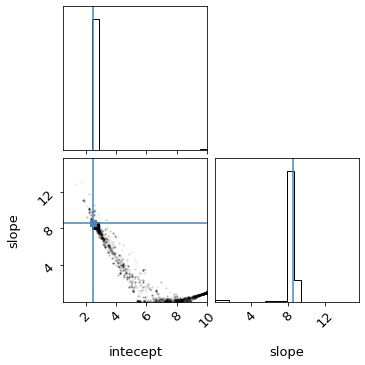

In [33]:
!pip install corner
import corner
pl.rcParams["font.size"]= 13
fig = corner.corner(
    flat_samples, labels=["intecept", "slope"], truths=mcmc[:,1]);

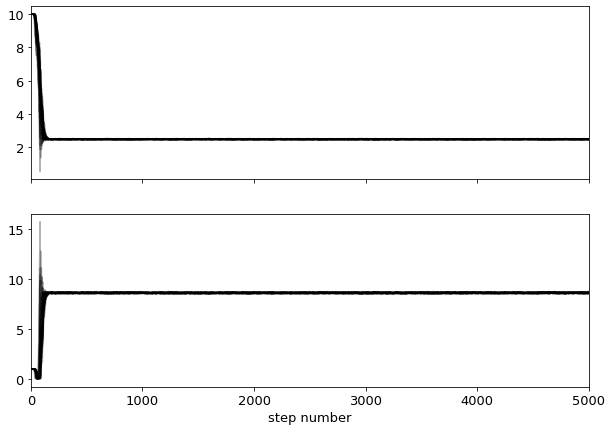

In [34]:
#visualizzare le catene
fig, axes = pl.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()

for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

## BROKEN POWER LAW mcmc

In [ ]:
def bpl (theta, x):
    a1, a2, Tb, b = theta
    return b - np.log10((x/Tb)**(-a1) + (x/Tb)**(-a2))
def log_likelihood_bpl(theta, x, y, yerr):
    return -np.sum(((y - bpl(theta, x))**2) / yerr**2)

In [ ]:
x_nolog = data[data.upperlimit == 0].time.values
x_nolog.min(), x_nolog.max()

(66, 51257)

In [ ]:
def log_prior_bpl(theta):
    a1, a2, Tb, b = theta
    if a1 > 0 and a2 > 0 and b > 0 and  x_nolog.min() < Tb <  x_nolog.max():
        return 0.0
    return -np.inf

def log_probability_bpl(theta, x, y, yerr):
  lp = log_prior_bpl(theta)
  if not np.isfinite(lp):
    return -np.inf 
  
  return lp + log_likelihood_bpl(theta, x, y, yerr)

In [ ]:
nll = lambda *args: -log_likelihood_bpl(*args)
ig = [0.2, 5, 1000, 20]

soln = minimize(nll, ig, args=(x_nolog, y, s))
soln

      fun: 217.4653148061869
 hess_inv: array([[ 0.01338726, -0.00258176, -0.02678465,  0.00175664],
       [-0.00258176,  0.00070347,  0.0048172 , -0.00041109],
       [-0.02678465,  0.0048172 ,  0.05433035, -0.00342656],
       [ 0.00175664, -0.00041109, -0.00342656,  0.00034364]])
      jac: array([5.53131104e-05, 4.00543213e-05, 1.90734863e-05, 1.33514404e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 1098
      nit: 69
     njev: 181
   status: 2
  success: False
        x: array([  3.54790516,   2.1456743 , 273.61857641,  15.04731019])

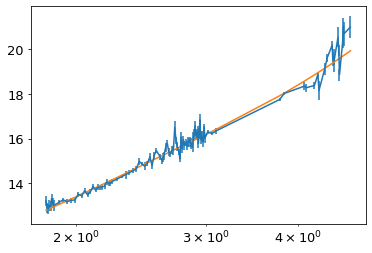

In [ ]:
ig = soln.x

pl.errorbar(x, y, yerr=s)
pl.plot(x, bpl(ig, x_nolog))
pos = np.array(ig) + 1e-4 * np.random.randn(32, len(ig))
nwalkers, ndim = pos.shape
labels = ["intercept","slope"]
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability_bpl, args=(x, y, s))
pl.xscale("log")

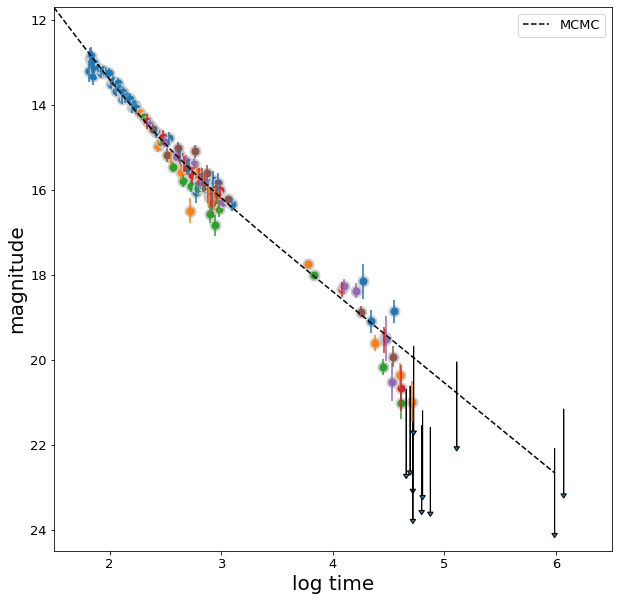

In [ ]:
ax = pl.figure(figsize=(10,10)).add_subplot(111)

for f in data["filter"].unique():
    pl.errorbar(data.loc[data["filter"] == f, "logtime"], 
                data.loc[data["filter"] == f, "mag"], 
                yerr=data.loc[data["filter"] == f, "magerr"], fmt='.', ms=0,
                fcolor=None, label=None)
    
# replot to add a better marker (optional)
for f in data["filter"].unique():
    pl.scatter(data.loc[data["filter"] == f, "logtime"], 
               data.loc[data["filter"] == f, "mag"], 
               alpha=1, s=100, linewidth=2,
               edgecolor='#cccccc', label=None)
    

# plot the upperlimits as arrows
nuplim = data.mag.isna().sum()
for i in data[data.upperlimit == 1].index:
    pl.arrow(data.loc[i].logtime, 
             data.loc[i].magerr, 0, 2, 
            head_width=0.05, head_length=0.1, ec='k')
    
#plotting models
#use Kelley colors for maximum readability
#https://gist.github.com/ollieglass/f6ddd781eeae1d24e391265432297538
colors = ['C2B280', '848482', '008856', 'E68FAC', '0067A5', 'F99379', 
          '604E97', 'F6A600', 'B3446C', 
          'DCD300', '882D17', '8DB600', '654522', 'E25822', '2B3D26',
          '222222', 'F3C300', '875692', 'F38400', 'A1CAF1', 'BE0032', ]

ax.plot(np.arange(1.5,6,0.01), 
        bpl(ig, 10**np.arange(1.5,6,0.01)), ls="--", c="k", 
        label="MCMC")

pl.legend()

#with the LinearRegression object I can also do
#pl.plot(grbAG.logtime, lr.predict(np.c_[np.ones((len(grbAG), 1)), grbAG.logtime]), 'k-')

pl.ylim(24.5,11.7)
pl.xlim(1.5, 6.5)
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time", fontsize=20);

In [ ]:
sampler.run_mcmc(pos, 5000, progress=True);

100%|██████████| 5000/5000 [00:12<00:00, 399.66it/s]


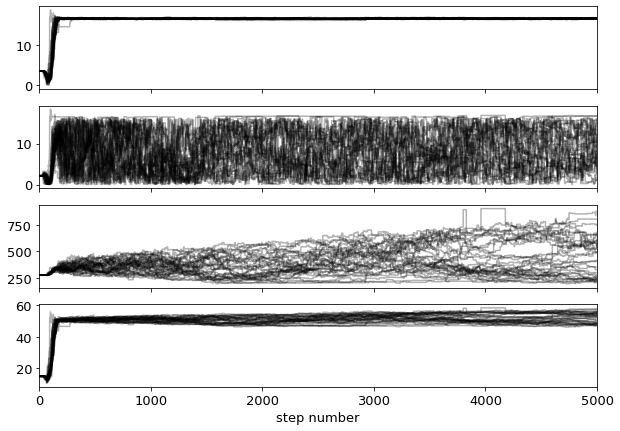

In [ ]:
fig, axes = pl.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()

for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [ ]:
flat_samples = sampler.get_chain(discard=1000, thin=15, flat=True)
mcmc = np.zeros((ndim, 3))
for i in range(ndim):
    mcmc[i] = np.percentile(flat_samples[:, i], [16, 50, 84])
    
mcmc[:,1]

array([ 16.60720003,   7.70024075, 371.84055923,  51.03512113])

NameError: ignored

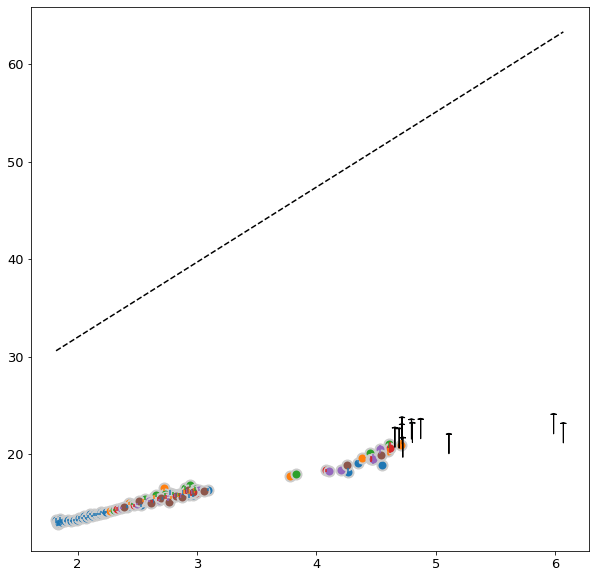

In [ ]:
grbAG = data
ax = pl.figure(figsize=(10,10)).add_subplot(111)

for f in grbAG["filter"].unique():
    pl.errorbar(grbAG.loc[grbAG["filter"] == f, "logtime"], 
                grbAG.loc[grbAG["filter"] == f, "mag"], 
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"], fmt='.', ms=0,
                fcolor=None, label=None)
    
# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    pl.scatter(grbAG.loc[grbAG["filter"] == f, "logtime"], 
               grbAG.loc[grbAG["filter"] == f, "mag"], 
               alpha=1, s=100, linewidth=2,
               edgecolor='#cccccc', label=None)
    

# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].logtime, 
             grbAG.loc[i].magerr, 0, 2, 
            head_width=0.05, head_length=0.1, ec='k')
    
#plotting models
#use Kelley colors for maximum readability
#https://gist.github.com/ollieglass/f6ddd781eeae1d24e391265432297538
colors = ['C2B280', '848482', '008856', 'E68FAC', '0067A5', 'F99379', 
          '604E97', 'F6A600', 'B3446C', 
          'DCD300', '882D17', '8DB600', '654522', 'E25822', '2B3D26',
          '222222', 'F3C300', '875692', 'F38400', 'A1CAF1', 'BE0032', ]

ax.plot(grbAG.logtime.values, line(mcmc[:,1][0], mcmc[:,1][1], 
                            grbAG.logtime.values), ls="--", c="k", label="MCMC")
#plotting models
#use Kelley colors for maximum readability
#https://gist.github.com/ollieglass/f6ddd781eeae1d24e391265432297538
colors = ['C2B280', '848482', '008856', 'E68FAC', '0067A5', 'F99379', 
          '604E97', 'F6A600', 'B3446C', 
          'DCD300', '882D17', '8DB600', '654522', 'E25822', '2B3D26',
          '222222', 'F3C300', '875692', 'F38400', 'A1CAF1', 'BE0032', ]
#normal equation
plotline((lr.coef_[1], lr.intercept_), grbAG.logtime.values, 
         color='#'+colors[0],  alpha=0.5,
         label="Normal Equation", ax=ax)
#sklearn
plotline((theta_best[::-1]), grbAG.logtime,  
         color='#'+colors[2], symbol='-',
         label="sklearn LinearRegression", ax=ax)
#minimize L1
plotline((l1Solution.x[::-1]), grbAG.logtime,  
         symbol=':', alpha=0.5,
         label="L1 minimization", ax=ax)
#minimize L2
plotline((l2Solution.x[::-1]), grbAG.logtime,  
         symbol='--', alpha=0.5,
         label="L2 minimization", ax=ax)
#minimize chi2
plotline((chi2Solution.x[::-1]), grbAG.logtime, 
         color='#'+colors[3], symbol='-.', alpha=0.5,
         label=r"$\chi^2$ minimization", ax=ax)

pl.legend()

#with the LinearRegression object I can also do
#pl.plot(grbAG.logtime, lr.predict(np.c_[np.ones((len(grbAG), 1)), grbAG.logtime]), 'k-')
pl.axvline(np.log10(mcmc[2,1]))
pl.ylim(24.5,11.7)
pl.xlim(1.5, 6.5)
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time", fontsize=20);


In [ ]:
plot?


Object `plot` not found.
